<h1><center>Implementação, análise e teste de algoritmo para representação de ponto flutuante no Padrão IEEE 754</center></h1>
<center>
    <h4 style="margin-top: -15px; font-weight:normal;">UFRN - Departamento de Engenharia Elétrica</h4>
    <h4 style="margin-top: 5px; font-weight:normal;">Aluno: Hugo G Soares Fontes</h4>
    <h4 style="margin-top: 5px; font-weight:normal;">Professor: Dr. Paulo Motta</h4> 
</center>


<h1>Resumo</h1>

<p style="text-align: justify;">O presente trabalho tem como principal objetivo implementar o processo de conversão de números decimais para a representação binária proposta pela norma IEEE 754, bem como a conversão oposta, com dupla precisão. Para isso, desenvolveu-se nesse trabalho um algoritmo em Python 3.5.2 de conversão entre decimais e binários de 64 bits, através de uma "conversão bit-a-bit" a partir dos conceitos de mantissa, significância e sinal propostos na norma. Além disso, também desenvolveu-se um conjunto de funções capazes de gerar uma lista de valores, em decimal, de intervalos de sinais de acordo com o step, o ponto de início e a quatidade de amostras passados como parâmetros. Esses valores são gerados com o intuito de serem utilizados no teste do processo de conversão. Desse modo, os decimais produzidos sofreram um processo de conversão para binário padrão IEEE 754, com precisão dupla. Assim, os binários foram escritos em um arquivo de texto, em seguida, lidos, convertidos novamente para decimal e comparados com o original. Afim de análise e mensuração dos resultados, a conversão de decimal para binário implementada no projeto foi comparada com a realizada pela biblioteca BitString. Portanto, realizou-se testes de precisão e eficiência em relação ao tempo nos dois processos de conversão citados.</p>

# Introdução

<p style="text-align: justify; text-indent:4em"> Tendo em vista o sistema numério dos computadoes, binário, existem alguns métodos de representação de números decimais. Porém, em 1985 a IEEE lançou a norma 754 que institui um padrão para representação e operações de números binários com ponto flutuante. Antes disso, os computadores de diferentes empresas possuíam representação diferentes, o que ocasionava, por exemplo, que um software desenvolvido em um computador não executasse em um outro de uma empresa diferente.</p> 
<p style="text-align: justify; text-indent:4em"> Desse modo, buscou-se nesse trabalho analisar o referido padrão de representação, bem como implementar um algoritmo de conversão entre as base com uma alta taxa de precisão. Assim, o método de conversão desenvolvido foi comparado, em termos de eficiência em relação ao tempo e precisão, com a biblioteca BitString do Python.</p> 



# Referencial Teórico

<p style="text-align: justify; text-indent:4em">O IEEE é uma comunidade global cujo a sigla significa Instituto de Engenheiros Eletricistas e Eletrônicos). Ele possui como principal objetivo promover iniciativas para o avanço educacional, profissional e tecnológico. Assim, uma das suas principais atuações é no campo da intituição de normas e regulamentações tecnológicas usadas mundialmente (IEEE, 2017). Entre as diversas resoluções normativas do instituto, umas das mais importantes no âmbito da computação é IEEE 754, que padroniza a representação de " binários de ponto flutuante".</p> 

<p style="text-align: justify; text-indent:4em">Através dessa norma, dois padrões são regulamentados para a representação de números decimais em binários: com 32 (precisão simples) ou 64 bits(precisão dupla). Em ambas as representações, o conjunto de bits é dividido em 3 grupos: mantissa, expoente e sinal.</p>  


<img src="https://www.ibm.com/developerworks/java/library/j-jtp0114/float.gif"></img>
<center style="margin-top:6px;">Figura 1 - Representação em Binário IEEE 754(IBM,2017)</center>


<p style="text-align: justify; text-indent:4em"> Assim, pode-se ver que ambas as representações são essencialmente semelhantes. Na representação simples,  1 bit é dedicado ao sinal do número (0 para números positivos, 1 para negativos), 8 bits para o expoente (que é interpretado com um inteiro positivo) e 23 bits para a fração. (Goetz, 2017). Enquanto que na representação com precisão dupla 11 bits representam o expoente e 52 representam a mantissa. Essa representação pode ser vizualizada na Figura 2. Esse padrão possui algumas representações especiais, como o zero (todos os bits zerados da mantissa e do expoente) e infinito (todos os bits zerados da mantissa e todos os bits como 1 do expoente) </p>

<img src="http://web.sfc.keio.ac.jp/~rdv/keio/sfc/teaching/architecture/computer-architecture-2012/fp-e.png"></img>

<center style="margin-top:6px;">Figura 2 - Representação de ponto flutuante com precissão simples</center>


# Desenvolvimento do Projeto

<p style="text-align: justify; text-indent:4em"> O desenvolvimento desse projeto pode ser representado pela Figura 3. Inicialmente, são gerados um conjunto de valores decimais que representam uma determinada função matemática em um certo intervalo de tempo. Esses valores então sofrem dois processos de conversão para binário padrão IEEE 754 com dupla precisão: uma conversão desenvolvida nesse trabalho, convertendo o decimal com base no sinal, na mantissa e no expoente; e uma conversão utilizando apenas a biblioteca BitString do Python. Em seguida, os valores binários oriundos da primeira conversão são salvos em um arquivo com formato ".txt". Dessa maneira, o arquivo é lido e esse conjunto de binários, bem como o outro conjunto (resultante da conversão para "bin64" com BitString) são convertidos novamente para decimal com mais uma função implementada nesse trabalho. Portanto, tem-se dois conjuntos valores resultantes de processos de conversão diferentes que devem corresponder a um mesmo sinal original. </p>

<img src="https://uploaddeimagens.com.br/images/001/065/745/full/esquema.jpg?1503991502"></img>

<center>Figura 3 - Fluxo do projeto (Elaborado pelo autor)</center>



### Gerador de Sinais

<p style="text-align: justify; text-indent:4em">Esse arquivo do projeto é responsável por implementar funções que retornem a representação decimal de sinais descritos por algumas funções matemáticas, como seno, |seno|, cosseno, sinc e a descrita na célula abaixo. As seguintes funções retornam duas listas de 100 valores: uma com os números do domínio e outra com as imagens. Para isso, elas podem receber até 3 parâmetros: o início do intervalo, a quantidade de amostras e o step entre elas. O principal sinal analisado no trabalho é o descrito pela Equação 1 abaixo e representado pela função <span style="font-style: italic"> sinal_x()</span> do arquivo <span style="font-style: italic">sinais.py</span>. Todas as funções retornam duas listas: uma com os valores (as imagens, <span style="font-style: italic"> f(x)</span>) e outra com os elementos do domínio - <span style="font-style: italic"> x<span> - do intervalo usado. </p>


\begin{align*}
f(x) = \sqrt{ x^2 + 2x + 5}\ -2sin(x) - x^2 + 3 
\end{align*}
<center style="margin-top:6px;">Equação 1 - Equação que descreve a função principal entre os sinais (Elaborado pelo autor)</center>



In [2]:
# sinais.py
import math

# sin(x)
def seno(step=3.6, inicio=0.0, qtd_valores=100):
    valores = []
    num = inicio
    tempo = []
    for i in range(qtd_valores):
        tempo += [num]
        valores += [math.sin(math.radians(num))  ]
        num += step

    return valores, tempo

# cos(x)
def cosseno(step=3.6, inicio=0.0, qtd_valores=100):
    valores = []
    num = inicio
    tempo = []
    for i in range(qtd_valores):
        tempo += [num]
        valores += [math.cos(math.radians(num))  ]
        num += step

    return valores, tempo

# |sin(x)|
def senop(step=3.6, inicio=0.0, qtd_valores=100):
    valores = []
    num = inicio
    tempo = []
    for i in range(qtd_valores):
        tempo += [num]
        valores += [abs(math.sin(math.radians(num)))]
        num += step

    return valores, tempo

# sin(x)/x
def sinc(step=7.2, inicio=0.000001, qtd_valores=100):
    valores = []        
    num = inicio
    tempo = []
    for i in range(qtd_valores):
        tempo += [num]
        if num == 0.0:
            num = 0.000000000000000000000001 
        valores += [math.sin(math.radians(num))/num  ]
        num += step

    return valores, tempo
 
# (x² + 2x  +)^(1/2) - 2sin(x) - x² + 3 
def sinal_x(step=1.0, inicio=0.0, qtd_valores=100):
    valores = []
    tempo = []
    x = inicio
    for i in range(qtd_valores):
        tempo += [x]
        valores += [ (((x**2) + 2*x + 5.0)*(1/2)) - (2*math.sin(x)) - (x**2) + 3 ]
        x += step

    return valores, tempo

def doisExp(step=1.0, inicio=0.0, qtd_valores=100):
    valores = []
    tempo = []
    x = inicio
    for i in range(qtd_valores):
        tempo += [x]
        valores += [2**x]
        x += step

    return valores, tempo

<p style="text-align: justify; text-indent:4em">Por sua vez, esse arquivo é responsável por implementar a comunicação via arquivos em formato ".txt" através de suas 3 funções. A função de escrever no arquivo imprime o conjunto de números binários (separados por um espaço) oriundos da conversão desenvolvida no trabalho. Esses dados podem ser lidos justamente pela função de leitura que retorna a lista com todos os binários encontrados. A outra função imprime uma tabela com os números originais em decimal e a sua representação em binário resultante da conversão desenvolvida. Para melhor formatar a tabela, utilizou-se a biblioteca <span style="font-style: italic"> tabulate </span> do python.</p>

In [3]:
# hermes.py 
from tabulate import tabulate

def ler_arquivo(nome):
    numeros_binarios = []
    linhas = []
    arquivo = open(nome, "r")
    for linha in arquivo:
        linhas += [linha]
    for linha in linhas:
        numeros_binarios += linha.replace('\n','').split(' ')
        
    return numeros_binarios

def escrever_arquivo(nome, linhas):
    arquivo = open(nome, "w")
    x = 1
    for linha in linhas:
        arquivo.write(linha)
        arquivo.write(" ")
        if x==2:
            arquivo.write("\n")
            x==1

    arquivo.close()

def escrever_tabela_arquivo(nome, linhas, cabecalho):
    arquivo = open(nome, "w")
    arquivo.write(tabulate(linhas,  headers=cabecalho, tablefmt='grid'))

    arquivo.close()

#Classe de formatacao dos prints
class fp:
    #Cores
    W  = '\033[0m'  
    R  = '\033[31m' 
    G  = '\033[32m' 
    O  = '\033[33m' 
    B  = '\033[34m' 
    P  = '\033[35m' 
    END = '\033[30m'


<p style="text-align: justify; text-indent:4em">O arquivo conversoes.py é o responsável por realizar todas as conversões necessários. Dessa maneira, ele possui 3 funções básicas: uma que converte de decimal para "bin64" utilizando a biblioteca BitString e duas desenvolvidas na íntegra no presente trabalho, uma que também converte um decimal para "bin64" e a outra que faz a conversão contrária.</p>
<ul>
    <li><strong>Decimal->Bin64 com BitString:</strong> Ela apenas recebe um decimal que é passado como parâmetro para a função BitArray( da BitString) e retorna o binário (em string) resultante.</li>
    <li style="text-align: justify;"><strong>Bin64->Decimal:</strong> Ela recebe uma string que representa um bin64. Em seguida, converte essa string em um vetor de inteiros. O primeiro elemento desse vetor é utilizado para representar o sinal, os 11 subsequentes são utilizados na função converter multiplicador que retorna uma potência de base dois e os outros 52 são passados como parâmetro da função converter mantissa que retorna justamente a mantissa. Assim a função retorna a mantissa X multiplicador X (-1)^sinal, que é justamente o valor em decimal da representação binária. Esse processo pode ser ilustrado pela Figura 4.</li>
    <img src="https://uploaddeimagens.com.br/images/001/065/746/full/decimal-bin64.jpg?1503991703">
    <center style="margin-bottom:10px">Figura 4 - Conversão de Bin64 para Decimal (Elaborada pelo Autor)</center>
    <li style="text-align: justify;"><strong>Decimal -> Bin64 desenvolvida: </strong> Ela recebe um decimal e atua de maneira diferente de acordo com três casos: módulo igual a zero, módulo maior que 1 e módulo menor do que 1. Quando o módulo é igua</li>
        <ul>
        <li style="text-align: justify;"><strong>| numero | == 0</strong> a função retorna o vetor com primeiro bit sendo 1 ou 0 e os outros 63 como 0. </li>
        <li style="text-align: justify;"><strong>| numero | < 1 </strong> a parte decimal do número sofre sucessivas multiplcações por 2 até que |decimal| >= 1. A cada multiplicação o expoente da potência de base dois (incialmente 2^1023) é divivido por dois. Cada vez que parte inteira resultante dessa multiplicação for igual 1, ela representa um 1 na mantissa. Em seguida, o resultado da base dois também é convertido para um binário de 11 bits. </li>
        <li style="text-align: justify;"><strong>| numero | > 1 </strong> a parte decimal do número sofre sucessivas divisões por 2 até que 1 < |número| < 2, resultando em um "resto". A cada multiplicação o expoente da potência de base dois (inicialmente 2^1023) é multiplicado por dois. Esse processo é análogo a multiplicar potência na base dois e dividir o número pela parte inteira de seu logaritmo na base 2. Em seguida, a parte decimal do resto sofre 52 multiplicações sucessiva (sempre a parte decimal), de modo que o valor da parte inteira (ou 0 ou 1, já é um número menor do que 1 sendo multiplicado por 2) corresponde a um bit da mantissa. Em seguida, o resultado da base dois também é convertido para um binário de 11 bits.</li>
    </ul>
<ul>
<img src="https://uploaddeimagens.com.br/images/001/065/751/full/bin64-para-decimal.jpg?1503994729">
<center style="margin-bottom:10px">Figura 5 - Conversão de Decimal para Bin64(Elaborada pelo Autor)</center>

In [4]:
# conversões.py
import bitstring
import math

def converter_multiplicador(binario):
    ''' Siignificancia, Expoente etc '''
    binario = ''.join(map(str, binario))
    E = int(binario,2)
    expoente = E - 1023
    
    return 2 ** expoente

def converter_mantissa(binario):
    ''' Mantissa, precisao etc '''
    num_convertido = 1
    for index, valor in enumerate(binario):
        if valor == 1:
            num_convertido += 1/((2)**(index+1))

    return (num_convertido)

def binario_para_decimal(numero, tipo="crescente"):
    ''' Converte um numero binario do padrao 754 do IEEE para decimal '''
    numero = list(map(int, numero))
    
    if len(numero) == 64:
        sinal = numero[0]
        multiplicador = [num for num in numero[1:12]]
        #usar range
        mantissa = [num for num in numero[12:64]]
        mantissa = converter_mantissa(mantissa)
        multiplicador = converter_multiplicador(multiplicador)
        numero = mantissa * multiplicador * ((-1)**numero[0])

        return (numero)
    
    else:
        return "numero invalido"

def decimal_para_binario64(numero):
    binario = [0] * 64
    if numero < 0:
        binario[0] = 1

    numero = abs(numero)
    if abs(numero)>1:
        E = int(math.log(abs(numero),2)//1)
        multiplicador = 1023+E
        multiplicador = list(map(int,'{:011b}'.format(multiplicador)))
        binario[1:12] = multiplicador[0:11]
        resto = abs(numero) / (2 ** E)
        for i in range(12,64):
            resto = resto - (resto//1)
            resto *= 2
            if resto >= 1:
                binario[i] = 1

    elif numero == 0.0:
        pass
    elif numero == -0.0:
        binario[0] = 1

    else:
        multiplicador = 1023
        while numero < 1:
            numero = numero * 2
            multiplicador -= 1

        multiplicador = list(map(int,'{:011b}'.format(multiplicador)))
        binario[1:12] = multiplicador[0:11]
        resto = numero - (numero//1)
        for i in range(12,64):
            if resto > 1:
                resto = resto - (resto//1)
            resto *= 2
            if resto >= 1:
                binario[i] = 1


    return "".join(map(str,binario))

def decimal_para_binario64_bitstring(numero):
    resposta = bitstring.BitArray(float=numero, length=64)
    
    return resposta.bin



<p style="text-align: justify; text-indent:4em">O arquivo <span style="font-style: italic"> matematica.py </span> tem como objetivo implementar funções que realizem alguns procedimentos matemáticos. Uma dessas funções implementadas é a de calcular precisão com base no erro relativo entre os elementos de um sinal original e de um aproximado, baseada na Equação 2.</p>

\begin{align*}
erro =   \left |\frac{Original - Aproximado}{Original} \right |
\end{align*}
<center style="margin-top:6px;">Equação 2 - Erro Reltivo</center>



<p style="text-align: justify; text-indent:4em">Outra função implementada é a de calcular o desvio padrão, que assim como a função de calcular precisão, recebe dois conjuntos de valores, retornando o valor do desvio baseado na Equação 3.</p>


\begin{align*}
f(x) = \frac{\sqrt{ \sum_{i=0}^N (x_{i}-\bar x)^2 }} {n}\ 
\end{align*}
<center style="margin-top:6px;">Equação 3- Desvio Padrão</center>



In [5]:
def calcular_precisao(original, aproximado):
    erro = 0.0
    qtd_numeros = len(original)
    for i in range(qtd_numeros):
        if original[i] == 0.0:
            original[i] = 0.00000000000000000000001
        erro += abs( ((original[i] - aproximado[i]))/original[i] )/qtd_numeros

    return (1.0-erro)*100

def calcular_media(lista):
    total = 0.0
    for num in lista:
        total += num 
        
    return total/len(lista)

def calcular_desvio_padrao(lista):
    desvio = 0.0
    n = len(lista)
    media = calcular_media(lista)
    for num in lista: 
        desvio += (abs(num - media)**2)/n
    
    return desvio**(1/2)



<h1> Resultados</h1>

<p style="text-align: justify; text-indent:4em">Destarte, o arquivo <span style="font-style: italic">main.py</span> utiliza todas as funções implementadas até o momento para percorrer o fluxo proposto pela Figura 3. Para isso, ela defina inicialmente os parâmetros de <span style="font-style: italic">setup</span> (início do sinal, quantidade de amostras e <span style="font-style: italic">step</span> entre elas). Em seguida, a função <span style="font-style: italic">sinal_(x)</span> que representa o sinal da Equação 1 retorna duas listas decimais: uma com os elementos da imagem (chamada de sinal) e outra com os elementos do domínio. Assim, esses valores do sinal são convertidos por duas funções diferentes (conversão com a biblioteca <span style="font-style: italic">BitString</span> e a desenvolvida) e armazenados em duas listas correspondentes. Os elementos convertidos pela função desenvolvida no trabalho são escritos em um arquivo ".txt" e em seguida lidos novamente. Dessa maneira, os dois conjuntos de números binários passam pela conversão para decimal desenvolvida e originam duas listas de decimais. Assim, totalizando 3 conjuntos de decimais (contanto os valores originais do sinal). Desse modo, esses 3 conjuntos de valores são comparados através da geração de um gráfico utilizando a biblioteca <span style="font-style: italic">Matplotlib</span> e de dois processos de comparação para verificação da precisão da conversão. Além disso, imprimi-se uma tabela utilizando a biblioteca <span style="font-style: italic">BitString</span> com os valores decimais originais do sinal e com os valores oriundos da conversão desenvolvida (Original-Bin64-Decimal Aproximado). Essa tabela também é salva em um arquivo ".txt".</p>

<p style="text-align: justify; text-indent:4em">Portanto, percebe-se na execução do programa que a precisão do método desenvolvido é praticamente igual a precisão da conversão utilizando a BitString. De modo que ambos os métodos apresentam aproximadamente 100% de exatidão, o que indica uma representação satisfatória dos números decimais em binário padrão IEEE com dupla precisão.</p>


--> Precisão do método  DESENVOLVIDO:  100.0 %
--> Precisão do método com BitString:  100.0 %


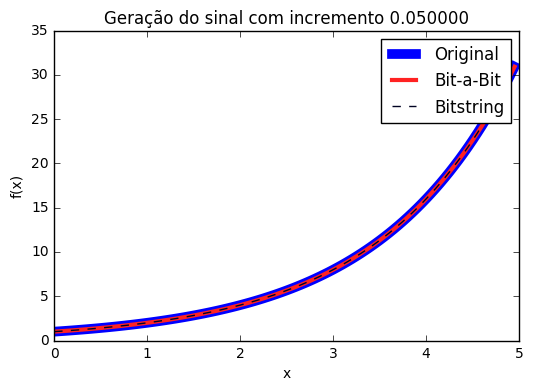


 +------------+------------------------------------------------------------------+----------------------+
|   Original |                                                              Bin |   Decimal Aproximado |
+============+==================================================================+======================+
|    1       | 0011111111110000000000000000000000000000000000000000000000000000 |              1       |
+------------+------------------------------------------------------------------+----------------------+
|    1.03526 | 0011111111110000100100000111000111110011111010011000001110101101 |              1.03526 |
+------------+------------------------------------------------------------------+----------------------+
|    1.07177 | 0011111111110001001001011111101111101110001001010000011001100100 |              1.07177 |
+------------+------------------------------------------------------------------+----------------------+
|    1.10957 | 00111111111100011100000011001011111010

In [15]:
# main.py
import matplotlib.pyplot as plt

def main():
    #Setup Inicial
    step = 0.05
    inicio = 0 
    qtd_amostras = 100
    
    sinal, tempo = doisExp(step, inicio, qtd_amostras)
    
    numeros_binarios = []
    numeros_binarios_bitstring = []
    
    for num in sinal:
        numeros_binarios += [decimal_para_binario64(num)]
        numeros_binarios_bitstring += [decimal_para_binario64_bitstring(num)]
    
    #Leitura e escrita em arquivo     
    escrever_arquivo("numeros_binarios.txt", numeros_binarios)
    numeros_binarios = ler_arquivo("numeros_binarios.txt")
    numeros_binarios.pop()

    # Conversão bit a bit
    numeros_decimais = []
    numeros_decimais_bitstring = []
    for i, numero_binario in enumerate(numeros_binarios):
        numeros_decimais += [binario_para_decimal(numero_binario)]
        numeros_decimais_bitstring += [binario_para_decimal(numeros_binarios_bitstring[i])]
    
    #Precisao dos metodos     
    precisao = calcular_precisao(sinal, numeros_decimais)
    precisao_bitstring = calcular_precisao(sinal, numeros_decimais_bitstring)

    #Grafico 
    plt.title('Geração do sinal com incremento %f' %(step))
    plt.xlabel("x")
    plt.ylabel("f(x)")
    legenda_original, = plt.plot(tempo, sinal, linestyle='-', marker='', linewidth=7.0, label="Original")
    legenda_binario_para_decimal, = plt.plot(tempo, numeros_decimais, linestyle='-', color="#ff2222",
        marker='', linewidth=3.0, label="Bit-a-Bit")
    legenda_binario_para_decimal_bitstring, = plt.plot(tempo, numeros_decimais_bitstring, linestyle='--',
        color="#000222", marker='', linewidth=1.0, label="Bitstring")

    plt.legend(handles=[legenda_original, legenda_binario_para_decimal,
        legenda_binario_para_decimal_bitstring])
    

    print("\n--> " + "Precisão do método" + "  DESENVOLVIDO: " + fp.R, precisao, "%")
    print(fp.END + "--> Precisão do método com", "BitString:", fp.G + "", precisao_bitstring, "%")

    plt.show()
    
    #Tabela comparativa
    tabela = []
    aux = [0,0, 0]
    for i in range(len(sinal)):
        tabela.append([])
        tabela[i] += [sinal[i]]
        tabela[i] += [numeros_binarios[i]]
        tabela[i] += [numeros_decimais[i]]
    
    print (fp.B + "\n", tabulate(tabela,  headers=['Original', 'Bin', 'Decimal Aproximado'], tablefmt='grid'))
    escrever_tabela_arquivo("tabela_comparativo.txt", tabela, ['Original', 'Bin', 'Decimal Aproximado'])
    
main()
    

<h3>Teste de Eficiência em Relação ao tempo</h3>

<p style="text-align: justify; text-indent:4em">Para se calcular com precisão a eficiência em relação ao tempo do algoritmo desenvolvido (decimal -> bin64), comparando-a também com a eficiência da conversão da BitString, implementou-se a rotina abaixo que mede o tempo das conversões para cada decimal de 3 sinais diferentes (cada um com 100 amostras) e 6 <span style="font-style: italic">steps </span> distintos, resultando em 1800 testes. Esse processo resultou na demonstração de que o tempo de conversão para bin64 do algoritmo desenvolvido foi, em decimal/s, cerca de 2.369152704877034e^-7 mais lento, sendo em torno de 5.042330291536731e^-7 s.</p> 

<p style="text-align: justify; text-indent:4em"> Ressalta-se que esse processo foi relizado em um computador de 64 bits com processador I5-200U de 2.2 GHz e memória ram DDR3 L 4GB.</p> 

Calculando...

Testado  2  vezes em  1  sinais diferentes
Algoritmo desenvolvido => Média da conversão em segundos por decimal: 4.309415817260742e-05  com desvio padrão  3.516674041748047e-06
Utilizando   BitString => Média da conversão em segundos por decimal: 3.737211227416992e-05  com desvio padrão  1.519918441772461e-05


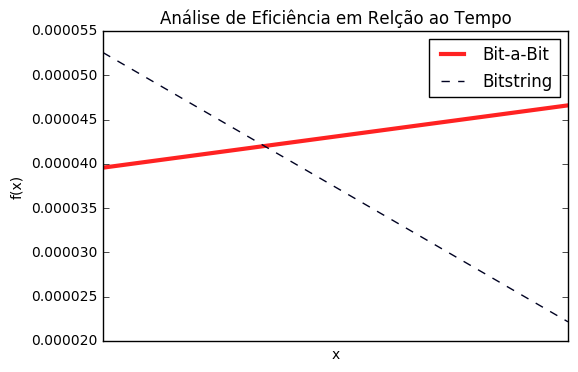

In [22]:
# teste.py
import time
import matplotlib.pyplot as plt

def teste_eficiencia(): 
    #Setup incial     
    steps = [1.0, 0.1, 0.05, 10.0, 0.9, 20]
    inicio = 0.0
    qtd_amostras = 100
    sinais = [sinal_x, seno, sinc]
    tempo = []
    tempo_bitstring = []
    print("Calculando...")
    
    for funcao in sinais:
        for step in steps:
            for i in range(100):
                sinal, t = funcao(step, inicio, qtd_amostras)

                numeros_binarios = []
                numeros_binarios_bitstring = []
                
                for num in sinal:
                    inicio = time.time()    
                    decimal_para_binario64(num)
                    fim = time.time()
                    tempo += [(fim-inicio)/len(sinal)]

                for num in sinal:
                    inicio = time.time()
                    decimal_para_binario64_bitstring(num)
                    fim = time.time()
                    tempo_bitstring += [(fim-inicio)/len(sinal)]
    
    print("\nTestado ", fp.R + str(len(sinais)*len(steps)*qtd_amostras) + fp.END, " vezes em ", fp.R + str(len(sinais)) + fp.END ," sinais diferentes")
    print("Algoritmo desenvolvido => Média da conversão em segundos por decimal:", fp.R + str(calcular_media(tempo)) + fp.END, 
          " com desvio padrão ", fp.R + str(calcular_desvio_padrao(tempo)) + fp.END)
    print("Utilizando   BitString => Média da conversão em segundos por decimal:", fp.B + str(calcular_media(tempo_bitstring)) + fp.END, 
          " com desvio padrão ", fp.B + str(calcular_desvio_padrao(tempo_bitstring)) + fp.END) 
    
    plt.title('Análise de Eficiência em Relção ao Tempo' )
    plt.xlabel("x")
    plt.ylabel("f(x)")
    legenda_binario_para_decimal, = plt.plot(tempo, linestyle='-', color="#ff2222",
        marker='', linewidth=3.0, label="Bit-a-Bit")
    legenda_binario_para_decimal_bitstring, = plt.plot(tempo_bitstring, linestyle='--',
        color="#000222", marker='', linewidth=1.0, label="Bitstring")

    plt.legend(handles=[legenda_binario_para_decimal,
        legenda_binario_para_decimal_bitstring])
    
    plt.xticks([])
    
    plt.show()
    
teste_eficiencia()

<h3>Teste de Precisão</h3>

<p style="text-align: justify; text-indent:4em">Para realmente calcular a precisão do algoritmo desenvolvido, comparando-a também com a exatidão da representação da BitString, implementou-se a rotina abaixo que compara a representação para 3 sinais diferentes (cada um com 100 amostras) e 6 <span style="font-style: italic">steps </span> distintos, resultando em 1800 testes. Esse processo resultou em precisões médias iguais entre as duas conversões (aproximadamente: 99.6666666666667) e um desvio padrão muito parecido, com um diferença praticamente irrisória, onde a conversão desenvolvida apresentou um desvio 0,000000000001 menor.</p>

Calculando...

Testado  500  vezes em  1  sinais diferentes
Algoritmo desenvolvido, 'Bit-a-Bit' => Média da precisão: 100.0  com desvio padrão  0.0
Utilizando a bilbioteca  Bit-String => Média da precisão: 100.0  com desvio padrão  0.0


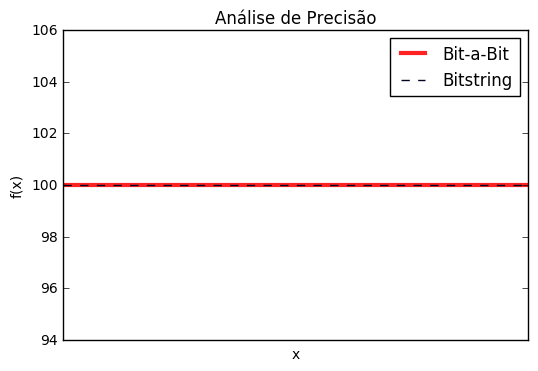

In [25]:
import matplotlib.pyplot as plt

def teste_precisao(): 
    #Setup incial     
    steps = [1.0, 0.1, 0.05, 10.0, 0.9]
    inicio = 0.0
    qtd_amostras = 100
    sinais = [doisExp]
    precisao = []
    precisao_bitstring = []
    print("Calculando...")
    
    for funcao in sinais:
        for step in steps:
            for i in range(100):
                sinal, tempo = funcao(step, inicio, qtd_amostras)

                numeros_binarios = []
                numeros_binarios_bitstring = []

                for num in sinal:
                    numeros_binarios += [decimal_para_binario64(num)]
                    numeros_binarios_bitstring += [decimal_para_binario64_bitstring(num)]

                # Conversão bit a bit
                numeros_decimais = []

                for numero_binario in numeros_binarios:
                    numeros_decimais += [binario_para_decimal(numero_binario)]

                # Conversão usando a bitstring
                numeros_decimais_bitstring = []
                for numero_binario in numeros_binarios_bitstring:
                    numeros_decimais_bitstring += [binario_para_decimal(numero_binario)]

                precisao += [calcular_precisao(sinal, numeros_decimais)]
                precisao_bitstring += [calcular_precisao(sinal, numeros_decimais_bitstring)]
    
    print("\nTestado ", fp.R + str(len(precisao)) + fp.END, " vezes em ", fp.R + str(len(sinais)) + fp.END ," sinais diferentes")
    print("Algoritmo desenvolvido, 'Bit-a-Bit' => Média da precisão:", fp.R + str(calcular_media(precisao)) + fp.END, 
          " com desvio padrão ", fp.R + str(calcular_desvio_padrao(precisao)) + fp.END)
    print("Utilizando a bilbioteca  Bit-String => Média da precisão:", fp.B + str(calcular_media(precisao_bitstring)) + fp.END, 
          " com desvio padrão ", fp.B + str(calcular_desvio_padrao(precisao_bitstring)) + fp.END) 
    
    plt.title('Análise de Precisão' )
    plt.xlabel("x")
    plt.ylabel("f(x)")
    legenda_binario_para_decimal, = plt.plot(precisao, linestyle='-', color="#ff2222",
        marker='', linewidth=3.0, label="Bit-a-Bit")
    legenda_binario_para_decimal_bitstring, = plt.plot(precisao_bitstring, linestyle='--',
        color="#000222", marker='', linewidth=1.0, label="Bitstring")

    plt.legend(handles=[legenda_binario_para_decimal,
        legenda_binario_para_decimal_bitstring])
    
    plt.xticks([])
    
    plt.show()

teste_precisao()

<p style="text-align: justify; text-indent:4em">Utilizando o escopo do projeto, reproduziu-se o fluxo proposto para outros sinais, como <span style="font-style: italic">seno, sinc, |seno| e cosseno.</span> O resultado desse processo poder ser visualizado no bloco abaixo.</span></p>


Precisão do algoritmo DESENVOLVIDO:  99.99999999999994 %
Precisão do  método com  BITSTRING:  100.0 %


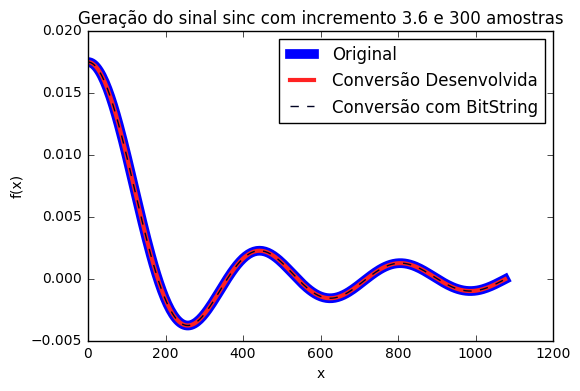


Precisão do algoritmo DESENVOLVIDO:  99.66666666666659 %
Precisão do  método com  BITSTRING:  99.66666666666667 %


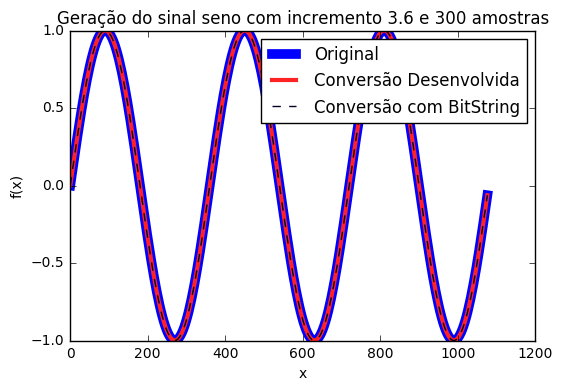


Precisão do algoritmo DESENVOLVIDO:  99.66666666666659 %
Precisão do  método com  BITSTRING:  99.66666666666667 %


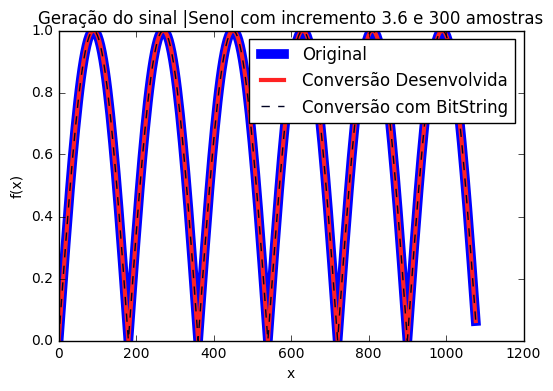


Precisão do algoritmo DESENVOLVIDO:  99.99999999999994 %
Precisão do  método com  BITSTRING:  100.0 %


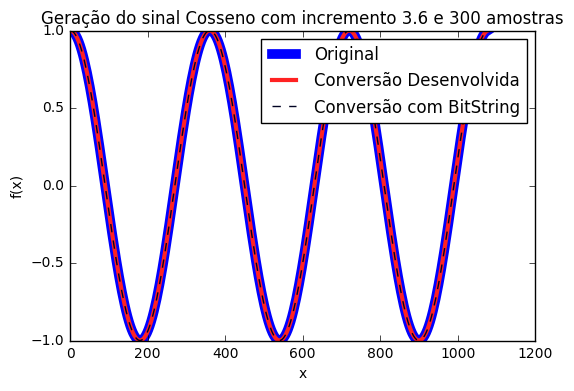

In [9]:
import matplotlib.pyplot as plt

def outras_funcoes(): 
    #Setup inicial     
    funcoes = [[sinc, "sinc"], [seno, "seno"], [senop, "|Seno|"], [cosseno, "Cosseno"]]
    step = 3.6
    inicio = 0.0
    qtd_amostras = 300 
    
    for funcao in funcoes:
        
        sinal, tempo = funcao[0](step, inicio, qtd_amostras)

        numeros_binarios = []
        numeros_binarios_bitstring = []

        for num in sinal:
            numeros_binarios += [decimal_para_binario64(num)]
            numeros_binarios_bitstring += [decimal_para_binario64_bitstring(num)]

        escrever_arquivo("numeros_binarios.txt", numeros_binarios)
        numeros_binarios = ler_arquivo("numeros_binarios.txt")
        numeros_binarios.pop()

        # Conversão bit a bit
        numeros_decimais = []

        for numero_binario in numeros_binarios:
            numeros_decimais += [binario_para_decimal(numero_binario)]

        # Conversão usando a bitstring
        numeros_decimais_bitstring = []
        for numero_binario in numeros_binarios_bitstring:
            numeros_decimais_bitstring += [binario_para_decimal(numero_binario)]
        
        #Precisao dos metodos         
        precisao = calcular_precisao(sinal, numeros_decimais)
        precisao_bitstring = calcular_precisao(sinal, numeros_decimais_bitstring)
        
        # Grafico         
        titulo = "Geração do sinal " + funcao[1] + " com incremento " + str(step) + " e " + str(qtd_amostras) + " amostras"
        plt.title('%s' %(titulo))
        plt.xlabel("x")
        plt.ylabel("f(x)")
        legenda_original, = plt.plot(tempo, sinal, linestyle='-', marker='', linewidth=7.0, label="Original")
        legenda_binario_para_decimal, = plt.plot(tempo, numeros_decimais, linestyle='-', color="#ff2222",
            marker='', linewidth=3.0, label="Conversão Desenvolvida")
        legenda_binario_para_decimal_bitstring, = plt.plot(tempo, numeros_decimais_bitstring, linestyle='--',
            color="#000222", marker='', linewidth=1.0, label="Conversão com BitString")

        plt.legend(handles=[legenda_original, legenda_binario_para_decimal,
            legenda_binario_para_decimal_bitstring])


        print("\nPrecisão do algoritmo DESENVOLVIDO:", fp.R, precisao, "%" + fp.END)
        print("Precisão do  método com  BITSTRING:", fp.R, precisao_bitstring, "%" + fp.END)

        plt.show()

outras_funcoes()

<h1>Conclusão</h1>

<p style="text-align: justify; text-indent:4em">Portanto, conclui-se através do presente trabalho a efetivividade do padrão IEEE 754 na representação de números decimais em binários com 64 bits. Uma vez que mesmo com a incapacidade do sistema numéro do computador em representar perfeitamente todos os números decimais, o erro é mínimo nesse padrão de representação, atendendo significativamente bem a maioria das situações práticas de computação, principalmente as relacionadas ao uso cotidiano.</p>
<p style="text-align: justify; text-indent:4em">Destarte, também comprovou-se a eficácia do algoritmo de conversão de binários em dupla precisão para decimais. Essa constatação foi resultado da comparação com o mesmo processo de conversão realizado pela biblioteca BitString do Python, onde ambas alcançaram a mesma média de precisão (99.66666666666667%) e a conversão desenvolvida alcançou um desvio padrão cerca de 0,000000000001 u.m. menor. Em contrapartida, o tempo de conversão de um decimal/s foi 2.369152704877034e^-7 mais lento. Ressalta-se que ambos os testes foram realizados para 3 sinais representados por funções diferentes, cada um amostrado 100 vezes para 6 steps distintos (1800 comparaçõoes) em um computador com processador I5-200U de 2.2 GHz e memória ram DDR3 L 4GB.</p> 
<p style="text-align: justify; text-indent:4em">Portanto, os objetivos foram alcançados, uma vez que projeto desenvolvido tinha como foco principal analisar o processo de representação do padrão IEEE 754 com precisão dupla e a sua eficiência. Assim, como trabalhos futuros, poderia ser implementado ou análisado: o contexto do menor indíce de precisão dos valores do seno, a otimização do algoritmo de conversão, a comparação com métodos de conversão de outras bibliotecas disponíveis, bem como a ampliação do algoritmo para englobar também a representação com precisão simples.</p>

<h1>Referências e Bibliografia</h1>

<p style="text-align: justify;">BRIAN GOETZ. IBM. Where's your point?: Tricks and traps with floating point and decimal numbers. 2003. Disponível em: <https://www.ibm.com/developerworks/java/library/j-jtp0114/>. Acesso em: 26 ago. 2017.
</p>
<p style="text-align: justify;">ERIVELTON GERALDO NEPOMUCENO. Departamento de Engenharia Elétrica da Universidade Federal de São João Del-rei. Computação com Ponto Flutuante IEEE. 2016. Disponível em: <https://ufsj.edu.br/portal2-repositorio/File/nepomuceno/compieee.pdf>. Acesso em: 26 ago. 2017.</p>
<p>IEEE. About IEEE. Disponível em: <https://www.ieee.org/about/index.html>. Acesso em: 26 ago. 2017.</p>
<p style="text-align: justify;">MARCOS EDUARDO VALLE. Universidade Estadual de Campinas. Representação e Operações Aritméticas em Ponto Flutuante. [20--]. Disponível em: <http://www.ime.unicamp.br/~valle/Teaching/2015/MS211/Aula1.pdf>. Acesso em: 26 ago. 1997.
</p>
